In [1]:
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.densenet import DenseNet121
from keras.applications.resnet import ResNet50
from keras.applications.xception import Xception
from keras.layers import GlobalAveragePooling2D, Dense
from keras.models import Model

In [2]:
batch_size = 32
epochs = 100
target_size = (256, 256)
folder_name = "testcovid"
directory = f"../Datasets/{folder_name}/Splitted_Dataset"

train_datagen = ImageDataGenerator(
    rescale=1/255,
    rotation_range=50,
    horizontal_flip=True,
    vertical_flip=True,
    validation_split=0.2,
)

test_datagen = ImageDataGenerator(rescale=1/255.)
# validation_datagen = ImageDataGenerator(rescale=1/255.)

train_generator = train_datagen.flow_from_directory(
    directory=f"{directory}/train",
    batch_size=batch_size,
    class_mode='categorical',
    target_size=target_size,
    subset="training",
)

test_generator = test_datagen.flow_from_directory(
    directory=f"{directory}/test",
    batch_size=batch_size,
    class_mode="categorical",
    target_size=target_size,
)

validation_generator = train_datagen.flow_from_directory(
    # directory=f"{directory}/val",
    directory=f"{directory}/train",
    batch_size=batch_size,
    class_mode="categorical",
    target_size=target_size,
    subset="validation",
)

Found 544 images belonging to 2 classes.
Found 172 images belonging to 2 classes.
Found 136 images belonging to 2 classes.


# DenseNet Model

In [3]:
DenseNetBase = DenseNet121(weights='imagenet', include_top=False, input_shape=(256,256,3), classifier_activation='softmax')

layer = DenseNetBase.output
layer = GlobalAveragePooling2D()(layer)

layer = Dense(1024, activation='relu', kernel_initializer='he_normal')(layer)

DenseNetPreds = Dense(2, activation='sigmoid')(layer)

DenseNetModel = Model(inputs=DenseNetBase.input, outputs=DenseNetPreds)

print(f"Toplam DenseNet katman sayısı: {len(DenseNetModel.layers)}")

Toplam DenseNet katman sayısı: 430


In [4]:
for layer in DenseNetBase.layers:
    layer.trainable = False

for layer in DenseNetBase.layers[-100:]:
    layer.trainable = True

DenseNetModel.compile(optimizer='adadelta', loss='categorical_crossentropy', metrics=['accuracy'])
DenseNetModel.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 262, 262, 3)  0          ['input_1[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 128, 128, 64  9408        ['zero_padding2d[0][0]']         
                                )                                                                 
                                                                                              

In [5]:
DenseNetHistory = DenseNetModel.fit(
    x=train_generator, validation_data=validation_generator, epochs=epochs
)

# from keras.callbacks import EarlyStopping
# early_stopping = EarlyStopping(
#    monitor="val_accuracy",
#    min_delta=0,
#    patience=5,
#    verbose=1,
#    mode="max",
#    baseline=None,
#    restore_best_weights=True,
#    start_from_epoch=0,
# )
# DenseNetHistory = DenseNetModel.fit(
#     x=train_generator, validation_data=validation_generator, epochs=epochs, callbacks=[early_stopping]
# )

Epoch 1/100
17/17 [==============================] - 23s 1s/step - loss: 0.7991 - accuracy: 0.4798 - val_loss: 0.7978 - val_accuracy: 0.4926
Epoch 2/100
17/17 [==============================] - 17s 1s/step - loss: 0.8005 - accuracy: 0.4743 - val_loss: 0.7793 - val_accuracy: 0.4926
Epoch 3/100
17/17 [==============================] - 17s 1s/step - loss: 0.7811 - accuracy: 0.5092 - val_loss: 0.8248 - val_accuracy: 0.4191
Epoch 4/100
17/17 [==============================] - 17s 1s/step - loss: 0.7402 - accuracy: 0.5037 - val_loss: 0.8160 - val_accuracy: 0.4632
Epoch 5/100
17/17 [==============================] - 17s 1s/step - loss: 0.7402 - accuracy: 0.5202 - val_loss: 0.7899 - val_accuracy: 0.4706
Epoch 6/100
17/17 [==============================] - 17s 1s/step - loss: 0.7424 - accuracy: 0.5312 - val_loss: 0.7507 - val_accuracy: 0.4853
Epoch 7/100
17/17 [==============================] - 17s 1s/step - loss: 0.7420 - accuracy: 0.5129 - val_loss: 0.7556 - val_accuracy: 0.5294
Epoch 8/100
1

In [10]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(
    monitor="val_accuracy",
    min_delta=0,
    patience=5,
    verbose=1,
    mode="max",
    baseline=None,
    restore_best_weights=True,
)
DenseNetHistory2 = DenseNetModel.fit(
    x=train_generator, validation_data=validation_generator, epochs=10, callbacks=[early_stopping]
)

Epoch 1/10
17/17 [==============================] - 19s 1s/step - loss: 0.5806 - accuracy: 0.6912 - val_loss: 0.6117 - val_accuracy: 0.6691
Epoch 2/10
17/17 [==============================] - 17s 1s/step - loss: 0.5856 - accuracy: 0.6985 - val_loss: 0.6402 - val_accuracy: 0.6765
Epoch 3/10
17/17 [==============================] - 17s 1s/step - loss: 0.5650 - accuracy: 0.7169 - val_loss: 0.5793 - val_accuracy: 0.7353
Epoch 4/10
17/17 [==============================] - 17s 1s/step - loss: 0.5551 - accuracy: 0.7279 - val_loss: 0.6120 - val_accuracy: 0.6765
Epoch 5/10
17/17 [==============================] - 17s 1s/step - loss: 0.5558 - accuracy: 0.7224 - val_loss: 0.6097 - val_accuracy: 0.7132
Epoch 6/10
17/17 [==============================] - 17s 1s/step - loss: 0.5790 - accuracy: 0.6893 - val_loss: 0.5761 - val_accuracy: 0.7132
Epoch 7/10
17/17 [==============================] - 17s 1s/step - loss: 0.5435 - accuracy: 0.7261 - val_loss: 0.5867 - val_accuracy: 0.7206
Epoch 8/10
17/17 [==

In [11]:
DenseNetModel.evaluate(test_generator)

6/6 [==============================] - 3s 493ms/step - loss: 0.6018 - accuracy: 0.6919


[0.6017526388168335, 0.6918604373931885]

# ResNet

In [ ]:
ResNetBase = ResNet50(weights='imagenet', include_top=False, input_shape=(256,256,3), classifier_activation='softmax')

layer2 = ResNetBase.output

layer2 = GlobalAveragePooling2D()(layer2)

layer2 = Dense(1024, activation='relu')(layer2)

ResNetPreds = Dense(5, activation='softmax')(layer2)

ResNetModel = Model(inputs=ResNetBase.input, outputs=ResNetPreds)

print(f"Toplam ResNet katman sayısı: {len(ResNetModel.layers)}")

In [ ]:
for layer in ResNetBase.layers:
    layer.trainable = False

for layer in ResNetBase.layers[-10:]:
    layer.trainable = True

ResNetModel.compile(optimizer='adadelta', loss='categorical_crossentropy', metrics=['accuracy'])

ResNetModel.summary()

In [ ]:
ResNetHistory = ResNetModel.fit(
    x=train_generator, validation_data=validation_generator, epochs=epochs
)

In [ ]:
ResNetModel.evaluate(test_generator)

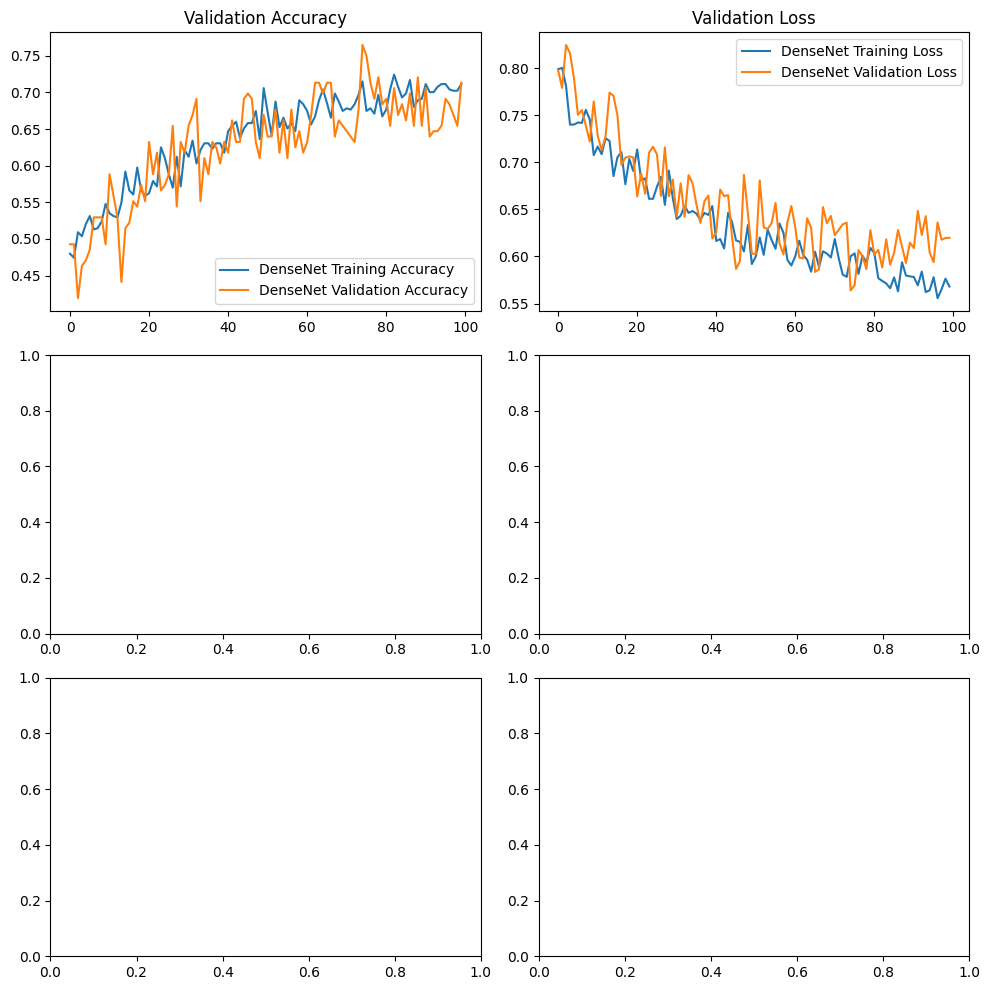

In [7]:
fig, axs = plt.subplots(3, 2, figsize=(10, 10))

# plt.suptitle("DenseNet - 100 Katman, ResNet - 10 Katman, Xception - 35 Katman Açık, AdaDelta Optimizer, Özel Epoch")

axs[0, 0].plot(DenseNetHistory.history['accuracy'], label='DenseNet Training Accuracy')
axs[0, 0].set_title('Training Accuracy')
axs[0, 0].legend()
axs[0, 0].plot(DenseNetHistory.history['val_accuracy'], label='DenseNet Validation Accuracy')
axs[0, 0].set_title('Validation Accuracy')
axs[0, 0].legend()

axs[0, 1].plot(DenseNetHistory.history['loss'], label='DenseNet Training Loss')
axs[0, 1].set_title('Training Loss')
axs[0, 1].legend()
axs[0, 1].plot(DenseNetHistory.history['val_loss'], label='DenseNet Validation Loss')
axs[0, 1].set_title('Validation Loss')
axs[0, 1].legend()

"""
axs[1, 0].plot(ResNetHistory.history['accuracy'], label='ResNet Training Accuracy')
axs[1, 0].set_title('Training Accuracy')
axs[1, 0].legend()
axs[1, 0].plot(ResNetHistory.history['val_accuracy'], label='ResNet Validation Accuracy')
axs[1, 0].set_title('Validation Accuracy')
axs[1, 0].legend()

axs[1, 1].plot(ResNetHistory.history['loss'], label='ResNet Training Loss')
axs[1, 1].set_title('Training Loss')
axs[1, 1].legend()
axs[1, 1].plot(ResNetHistory.history['val_loss'], label='ResNet Validation Loss')
axs[1, 1].set_title('Validation Loss')
axs[1, 1].legend()
"""

plt.tight_layout()
plt.show()

In [8]:
import os
from datetime import datetime
from nbconvert import HTMLExporter

folder_path = f"..\\Results\\{folder_name}"

if not os.path.exists(folder_path):
    os.makedirs(folder_path)

current_time = datetime.now().strftime("%H.%M_%d.%m.%Y")

html_filename = f"{current_time}.html"
html_file_path = os.path.join(folder_path, html_filename)

notebook_filename = "main_project.ipynb"
exporter = HTMLExporter()
output, _ = exporter.from_filename(notebook_filename)

with open(html_file_path, 'w', encoding='utf-8') as f:
    f.write(output)

print(f"Notebook saved to {folder_path} as {html_filename}")

Notebook saved to ..\Results\testcovid as 17.14_24.04.2024.html
